In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataGen = ImageDataGenerator( rescale=1./255)
imgGen = dataGen.flow_from_directory( './image', target_size=(98,98))

Found 20 images belonging to 2 classes.


In [ ]:
## 100개의

In [7]:
x_data, y_data = imgGen.next()

In [9]:
x_data.shape

(20, 98, 98, 3)

In [11]:
imgGen.class_indices

{'cat': 0, 'dog': 1}

In [12]:
x_data[0].shape

(98, 98, 3)

In [ ]:
plt.imshow( x_data[0] )
plt.plot()

In [15]:
y_data[0]

array([0., 1.], dtype=float32)

In [ ]:
model = Sequential()
model.add( Flatten( input_shape=(98,98,3)) )
model.add( Dense( units=64,  activation='relu') )
model.add( Dense( units=32,  activation='relu') )
model.add( Dense( units=2,  activation='softmax') )
model.compile( loss='categorical_crossentropy', 
              optimizer=Adam( 0.001 ), metrics=['acc'])
#model.fit( x_data, y_data, epochs= 100 )/
model.fit( imgGen, epochs=100)

<class 'PIL.Image.Image'>


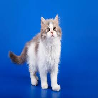

In [21]:
testImg = load_img( 'test.jpg', target_size=(98,98))
print( type(testImg))
testImg

In [24]:
imgArr = img_to_array(testImg)/255
imgArr.shape

(98, 98, 3)

In [25]:
98*98*3

28812

In [ ]:
1x28812 28812x64 = 1x64 64x32  1x32 32x2  =1x2

In [27]:
model.predict( imgArr.reshape(1,98, 98, 3)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([1], dtype=int64)